# Identificar fronteras no lineales

In [20]:
from sklearn.datasets import make_circles, make_blobs
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

In [3]:
X, Y = make_circles(100, factor=.1, noise=.1)

In [13]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ## Generamos la parrilla de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ## Representamos las fronteras y los márgenes del SVC
    ax.contour(X, Y, P, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])
    
    #print(model.support_vectors_)
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                   model.support_vectors_[:,1],
                  s = 300, linewidth=1, facecolors = 'black')
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

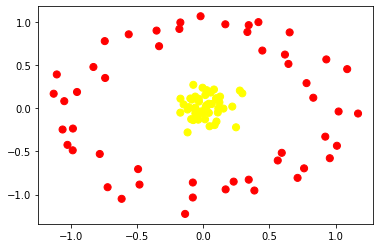

In [10]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap='autumn')

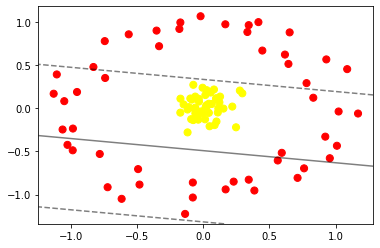

In [15]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap='autumn')
plt_svc(SVC(kernel='linear').fit(X,Y), plot_support=False)

Se ve que en este caso una separación lineal no sería lo adecuado. Vamos a imaginarnos que nuestros datos están en 3D y lo que diferencia los puntos rojos de los amarillos es la altura. De ahí hacemos lo siguiente:

In [16]:
r = np.exp(-(X**2).sum(1))

In [17]:
r

array([0.38978433, 0.99558206, 0.9776697 , 0.35782539, 0.34487569,
       0.98020911, 0.317341  , 0.40131869, 0.89634082, 0.29906603,
       0.94367983, 0.9552786 , 0.5053491 , 0.9980885 , 0.38383442,
       0.95244588, 0.49879463, 0.98802823, 0.98179726, 0.29880874,
       0.3406639 , 0.99641672, 0.34720078, 0.37392856, 0.97614872,
       0.922256  , 0.99524969, 0.35953863, 0.98397992, 0.21866153,
       0.41250765, 0.47786635, 0.95619818, 0.24881663, 0.29227952,
       0.97577341, 0.97646292, 0.3887529 , 0.88853637, 0.99871732,
       0.99632599, 0.46168015, 0.40642771, 0.96548162, 0.30737697,
       0.2988365 , 0.96827352, 0.22714168, 0.99588898, 0.25390793,
       0.3301585 , 0.98664257, 0.88710744, 0.98643365, 0.25186305,
       0.53042178, 0.34826759, 0.39869904, 0.97656351, 0.9860291 ,
       0.95844948, 0.4740005 , 0.52119007, 0.99639391, 0.50568955,
       0.4932318 , 0.95585709, 0.30452447, 0.99254431, 0.97863126,
       0.97773015, 0.5097217 , 0.30483115, 0.36282962, 0.96760

In [24]:
def plot_3D(elev=30, azim=30, X=X, Y=Y, r=r):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:,0], X[:,1], r, c=Y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    
    ax.set_xlabel('x[0]')
    ax.set_ylabel('y[1]')
    ax.set_zlabel('r')

In [26]:
 # Los fixed son los que no dejo tocar
interact(plot_3D, elev=[-90,-60,-30,0,30,60,90], azim=[-180,-150,-120,-90,-60,-30,0,30,60,90,120,150,180], X=fixed(X), Y=fixed(Y), r=fixed(r))

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-3.52385873e-01,  9.04425722e-01],
       [ 4.27146234e-02, -5.10214674e-02],
       [-6.01874651e-02,  1.37698466e-01],
       [-1.72474416e-01,  9.98980840e-01],
       [ 7.61703885e-01, -6.95973015e-01],
       [ 1.22387671e-01,  7.07856966e-02],
       [-1.98921358e-02,  1.07115950e+00],
       [ 1.69390702e-01, -9.40375577e-01],
       [ 2.47895186e-01, -2.19049154e-01],
       [ 6.52886044e-01,  8.83646258e-01],
       [-4.66332316e-03,  2.40720965e-01],
       [ 2.68164418e-02,  2.12210117e-01],
       [ 5.63000162e-01, -6.04596241e-01],
       [ 3.07878942e-02,  3.10713764e-02],
       [ 9.22037854e-01, -3.27704471e-01],
       [ 2.19661958e-01,  2.16937764e-02],
       [ 7.80356042e-01,  2.94287746e-01],
       [-1.08678245e-01,  1.52658330e-02],
       [-3.72409908e-02, -1.30320982e-01],
       [ 1.00990055e+00, -4.33650164e-01],
       [-7.85346416e-02, -1.03474211e+00],
       [-5.18209079e-03, -5.96896883e-02],
       

En este caso vemos que la separación sería encontrar un plano que se encuentre entre el medio de los dos grupos

In [37]:
rbf = SVC(kernel='rbf', C=1E6)
rbf.fit(X,Y)

SVC(C=1000000.0)

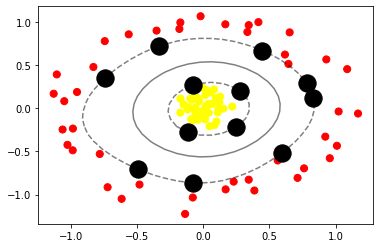

In [38]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap='autumn')
plt_svc(rbf)
#plt.scatter(rbf.support_vectors_[:,0], rbf.support_vectors_[:,1], s=300, lw=1, facecolors='none')

## Ajustar los parametros de SVM

In [39]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)

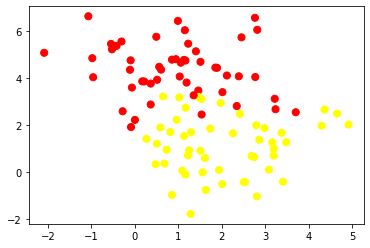

In [40]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap='autumn')

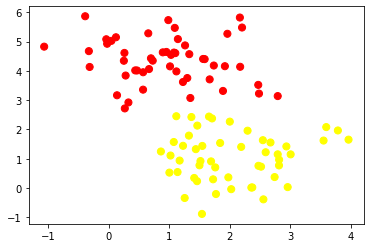

In [41]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap='autumn')

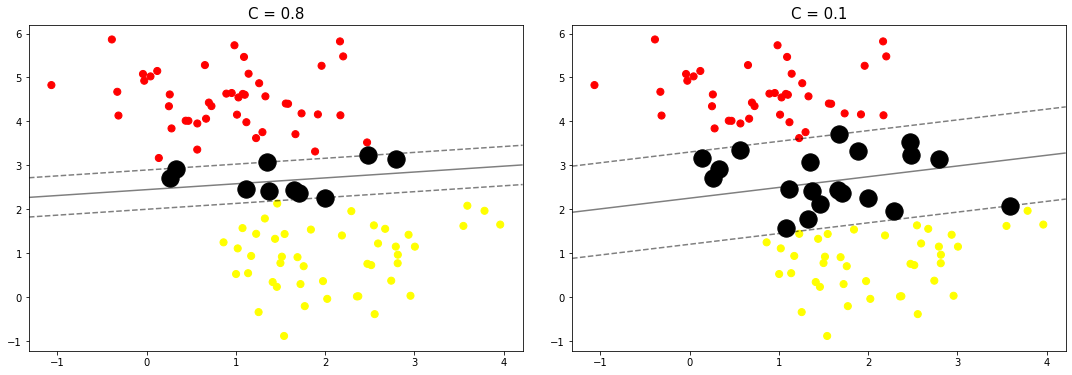

In [50]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.1)

for ax_i, C in zip(ax, [0.8, 0.1]):
    model = SVC(kernel='linear', C=C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0], X[:,1], c=Y, s=50, cmap='autumn')
    plt_svc(model, ax_i)
    ax_i.set_title('C = {0:.1f}'.format(C), size=15)